# BeautifulSoup
### BeautifulSoup is a python library used to pull data from the HTML and XML files


---Importing required libraries---

In [ ]:
from bs4 import BeautifulSoup

In [69]:
import csv

In [ ]:
import requests

### To parse a document, we need to pass it to the `BeautifulSoup` constructor either in the form of a string or a file

#### BeautifulSoup supports various parsers like `html.parser`, `html5lib`, `xml`, `lxml`

In [ ]:
with open('simple.html') as html_file:
  soup=BeautifulSoup(html_file,'lxml')

In [ ]:
print(soup.prettify())

In [ ]:
print(soup.title)

<title>Test - A Sample Website</title>


In [ ]:
print(soup.title.text)

Test - A Sample Website


In [ ]:
print(soup.div) #gets us the first div tag

<div class="article">
<h2><a href="article_1.html">Article 1 Headline</a></h2>
<p>This is a summary of article 1</p>
</div>


## with `find` method we can narrow down our search to the particular *tag* we are looking for

In [ ]:
match=soup.find("div",class_='footer') #gets us div with class footer, similarly if we wantwed to search by id, we could have given id
print(match)

<div class="footer">
<p>Footer Information</p>
</div>


## now, from our sample website we want to search for that `div` which has the *Article 1* info

In [ ]:
article=soup.find("div",class_='article')
print(article)

<div class="article">
<h2><a href="article_1.html">Article 1 Headline</a></h2>
<p>This is a summary of article 1</p>
</div>


In [ ]:
print(article.h2.text)
#or
print(article.h2.a.text)

Article 1 Headline
Article 1 Headline


In [ ]:
article.p.text

'This is a summary of article 1'

## using `find_all()` to fetch the list of tags that matches our result


In [ ]:
article_all=soup.find_all("div",class_='article')
print(article_all)      #returns the list of tags, so we can use a for loop on this

[<div class="article">
<h2><a href="article_1.html">Article 1 Headline</a></h2>
<p>This is a summary of article 1</p>
</div>, <div class="article">
<h2><a href="article_2.html">Article 2 Headline</a></h2>
<p>This is a summary of article 2</p>
</div>]


In [ ]:
for article in soup.find_all("div",class_='article'):
  print(article.h2.a.text)
  print(article.p.text)
  print('----------------------------')

Article 1 Headline
This is a summary of article 1
----------------------------
Article 2 Headline
This is a summary of article 2
----------------------------


## getting the source code from [this website](https://coreyms.com/) using `request` library
> The `request` module in python is used to send the http requests, the http requests returns a response object

In [ ]:
source=requests.get('https://coreyms.com/').text

## The `request.get()` returns a *response object* and to get the *source code* from that response object we use `.text` attribute.

### The website looks like this:
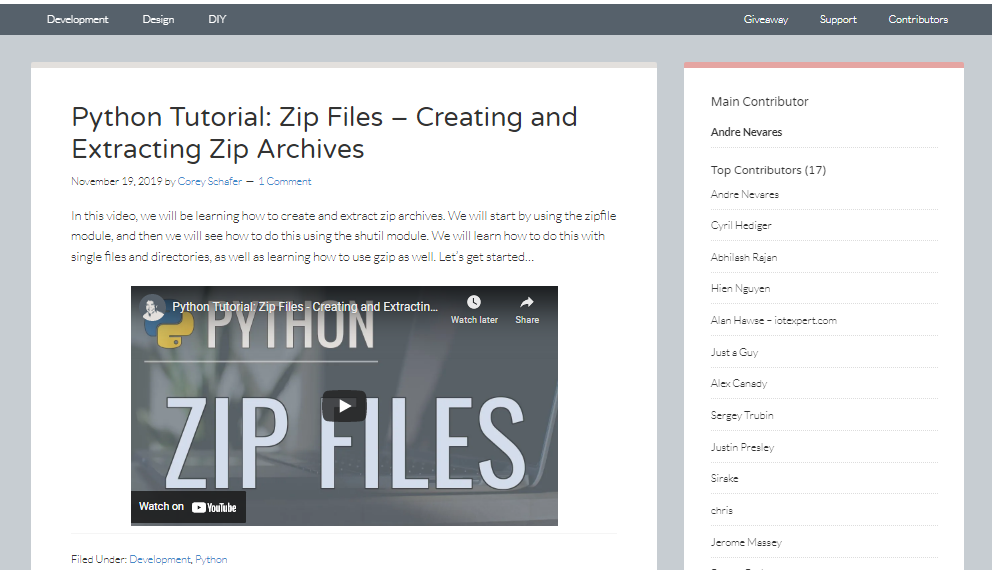
### we want to scrape the headline, summary and youtube link for all the posts on this website

In [ ]:
soup=BeautifulSoup(source,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This site is optimized with the Yoast SEO plugin v15.4 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   CoreyMS - Development, Design, DIY, and more
  </title>
  <meta content="Development, Design, DIY, and more" name="description"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <link href="https://coreyms.com/" rel="canonical"/>
  <link href="https://coreyms.com/page/2" rel="next"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="website" property="og:type"/>
  <meta content="CoreyMS - Development, Design, DIY, and more" property="og:title"/>
  <meta content="Development, Design, DIY, and more" property="og:description"/>
  <meta content="https://coreyms.com/" property="og:url"/>
  <meta content="CoreyMS" property="og:site_name"/>
  <meta content

In [25]:
soup.find('h2', class_='entry-title').text

'Python Tutorial: Zip Files – Creating and Extracting Zip Archives'

In [27]:
for title in soup.find_all('h2', class_='entry-title'):
  print(title.text)
  print("-------------------------------------------------")
  print()


Python Tutorial: Zip Files – Creating and Extracting Zip Archives
-------------------------------------------------

Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey
-------------------------------------------------

Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module
-------------------------------------------------

Python Threading Tutorial: Run Code Concurrently Using the Threading Module
-------------------------------------------------

Update (2019-09-03)
-------------------------------------------------

Python Quick Tip: The Difference Between “==” and “is” (Equality vs Identity)
-------------------------------------------------

Python Tutorial: Calling External Commands Using the Subprocess Module
-------------------------------------------------

Visual Studio Code (Windows) – Setting up a Python Development Environment and Complete Overview
-------------------------------------------------

Visual Studio Co

In [28]:
for summary in soup.find_all('div', class_='entry-content'):
  print(summary.p.text)
  print("-------------------------------------------------")
  print()

In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
-------------------------------------------------

In this Python Programming video, we will be learning how to download and analyze real-world data from the 2019 Stack Overflow Developer Survey. This is terrific practice for anyone getting into the data science field. We will learn different ways to analyze this data and also some best practices. Let’s get started…
-------------------------------------------------

In this Python Programming video, we will be learning how to run code in parallel using the multiprocessing module. We will also look at how to process multiple high-resolution images at the same time using a ProcessPoolExecutor from the concurrent.futures module. Let’s ge

In [37]:
for video_link in soup.find_all('iframe', class_='youtube-player'):
  print(video_link['src'])
  print()

https://www.youtube.com/embed/z0gguhEmWiY?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/_P7X8tMplsw?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/fKl2JW_qrso?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/IEEhzQoKtQU?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/mO_dS3rXDIs?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/2Fp1N6dof0Y?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

https://www.youtube.com/embed/-nh9rCzPJ20?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent


> ### Note: this is the link to the embedded video and not youtube video itself

---






*    we now have to parse the url string to grab the ` id` of that video
*    example: in the following url string
> https://www.youtube.com/embed/_JGmemuINww?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent

 #### the video id is `_JGmemuINww`



### sometimes the websites dont have information in the most accessible way so we need to look through other ways to get our work done

In [43]:
id=[]
for video_link in soup.find_all('iframe', class_='youtube-player'):
  src=str(video_link['src'])
  id_list=src.split('/')[-1]
  id_list=id_list.split("?")[0]
  id.append(id_list)

print(id)

['z0gguhEmWiY', '_P7X8tMplsw', 'fKl2JW_qrso', 'IEEhzQoKtQU', 'mO_dS3rXDIs', '2Fp1N6dof0Y', '-nh9rCzPJ20', '06I63_p-2A4', '_JGmemuINww']


### now we need to create youtube links using the `ids`

In [46]:
youtube_links=[]
for i in id:
  string=f'https://www.youtube.com/watch?v={i}'
  youtube_links.append(string)

print(youtube_links)

['https://www.youtube.com/watch?v=z0gguhEmWiY', 'https://www.youtube.com/watch?v=_P7X8tMplsw', 'https://www.youtube.com/watch?v=fKl2JW_qrso', 'https://www.youtube.com/watch?v=IEEhzQoKtQU', 'https://www.youtube.com/watch?v=mO_dS3rXDIs', 'https://www.youtube.com/watch?v=2Fp1N6dof0Y', 'https://www.youtube.com/watch?v=-nh9rCzPJ20', 'https://www.youtube.com/watch?v=06I63_p-2A4', 'https://www.youtube.com/watch?v=_JGmemuINww']


## Alternatively, we could have done using the article tag

In [31]:
for article in soup.find('article'):
  print(article.prettify())

<header class="entry-header">
 <h2 class="entry-title" itemprop="headline">
  <a class="entry-title-link" href="https://coreyms.com/development/python/python-tutorial-zip-files-creating-and-extracting-zip-archives" rel="bookmark">
   Python Tutorial: Zip Files – Creating and Extracting Zip Archives
  </a>
 </h2>
 <p class="entry-meta">
  <time class="entry-time" datetime="2019-11-19T13:02:37-05:00" itemprop="datePublished">
   November 19, 2019
  </time>
  by
  <span class="entry-author" itemprop="author" itemscope="" itemtype="https://schema.org/Person">
   <a class="entry-author-link" href="https://coreyms.com/author/coreymschafer" itemprop="url" rel="author">
    <span class="entry-author-name" itemprop="name">
     Corey Schafer
    </span>
   </a>
  </span>
  <span class="entry-comments-link">
   <a href="https://coreyms.com/development/python/python-tutorial-zip-files-creating-and-extracting-zip-archives#respond">
    <span class="dsq-postid" data-dsqidentifier="1670 http://corey

In [49]:
import textwrap

In [67]:
for article in soup.find_all("article"):
  headline=article.h2.a.text
  print(headline)
  print()

  summary=article.find('div',class_='entry-content')
  my_wrap = textwrap.TextWrapper(width = 60)
  wrap_list = my_wrap.wrap(text=summary.p.text)
  for line in wrap_list:
   print(line)

  video_link=article.find('iframe', class_='youtube-player')
  src=str(video_link['src'])
  src=src.split('/')[-1]
  src=src.split("?")[0]
  print(src)
  print(f'https://www.youtube.com/watch?v={src}')
  print()
  print()




Python Tutorial: Zip Files – Creating and Extracting Zip Archives

In this video, we will be learning how to create and extract
zip archives. We will start by using the zipfile module, and
then we will see how to do this using the shutil module. We
will learn how to do this with single files and directories,
as well as learning how to use gzip as well. Let’s get
started…
z0gguhEmWiY
https://www.youtube.com/watch?v=z0gguhEmWiY


Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey

In this Python Programming video, we will be learning how to
download and analyze real-world data from the 2019 Stack
Overflow Developer Survey. This is terrific practice for
anyone getting into the data science field. We will learn
different ways to analyze this data and also some best
practices. Let’s get started…
_P7X8tMplsw
https://www.youtube.com/watch?v=_P7X8tMplsw


Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module

In this Python Program

TypeError: ignored

### for first few post our code worked fine, but when it came to a post which did not have any youtube video, it printed the headline and summary but when it gets to youtube link, it breaks our script because for that post we do not have any youtube video link.

---
## here's how to fix it
> ### using try and except block

## and finally saving the information in the csv file

In [72]:
csv_file=open('scrapper.csv','w')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['Title','Summary','Youtube_Link'])      #passing a list of headers)

for article in soup.find_all("article"):
  headline=article.h2.a.text
  print(headline)
  print()

  summary=article.find('div',class_='entry-content')
  summary=summary.p.text
  my_wrap = textwrap.TextWrapper(width = 60)
  wrap_list = my_wrap.wrap(text=summary)
  for line in wrap_list:
   print(line)

  try:
    video_link=article.find('iframe', class_='youtube-player')
    src=str(video_link['src'])
    src=src.split('/')[-1]
    src=src.split("?")[0]
    link=f'https://www.youtube.com/watch?v={src}'
    
  except Exception as e:
    link=None
    
  print(link)

  csv_writer.writerow([headline,summary,link])


  print()
  print()

csv_file.close()




Python Tutorial: Zip Files – Creating and Extracting Zip Archives

In this video, we will be learning how to create and extract
zip archives. We will start by using the zipfile module, and
then we will see how to do this using the shutil module. We
will learn how to do this with single files and directories,
as well as learning how to use gzip as well. Let’s get
started…
https://www.youtube.com/watch?v=z0gguhEmWiY


Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey

In this Python Programming video, we will be learning how to
download and analyze real-world data from the 2019 Stack
Overflow Developer Survey. This is terrific practice for
anyone getting into the data science field. We will learn
different ways to analyze this data and also some best
practices. Let’s get started…
https://www.youtube.com/watch?v=_P7X8tMplsw


Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module

In this Python Programming video, we will be l